## Mini_Project_01

### Dependency

In [1]:
# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from scipy.stats import shapiro, probplot
from scipy import stats

# Artificial Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam, rmsprop

# Environmnets
import math
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Load data

In [78]:
sales = pd.read_csv('../data/sales_건강음료.csv', encoding='euc-kr')

### Preprocess

In [79]:
sales["YEAR"] = sales['YM'].astype('str').str[:4]
sales["MON"] = sales['YM'].astype('str').str[-2:]

In [80]:
sales.head()

,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY,YEAR,MON
0,200901,건강음료,37,1410,1543,4,126753,151,12,2009,01
1,200902,건강음료,37,1209,1543,9,113399,3014,8,2009,02
2,200903,건강음료,38,1348,1547,12,129162,1383,9,2009,03
3,200904,건강음료,38,1377,1500,19,126277,3564,8,2009,04
4,200905,건강음료,40,1406,1528,25,129584,9288,12,2009,05


#### Classfy Dataset with Year

In [83]:
s1 = sales[sales.YEAR=='2009']
s2 = sales[sales.YEAR=='2010']
s3 = sales[sales.YEAR=='2011']
s4 = sales[sales.YEAR=='2012']
s5 = sales[sales.YEAR=='2013']

In [84]:
s4.head()

,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY,YEAR,MON
36,201201,건강음료,30,1701,2112,3,203133,362,11,2012,01
37,201202,건강음료,31,1607,2182,5,186880,377,8,2012,02
38,201203,건강음료,31,1578,2182,11,212945,6556,10,2012,03
39,201204,건강음료,42,1541,10944,18,209151,17042,9,2012,04
40,201205,건강음료,42,1662,10944,24,215673,2095,10,2012,05


#### Preview Dataset & Plot

- Time-series Plot

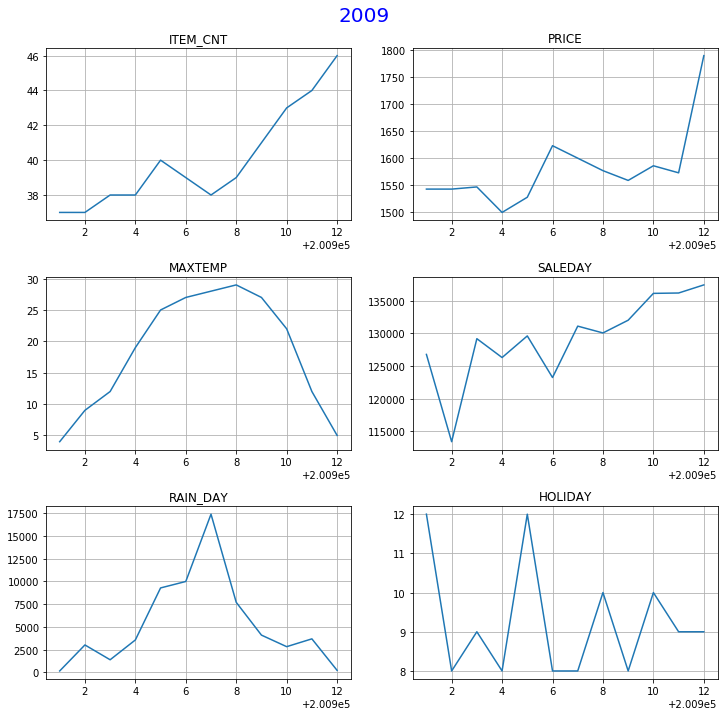

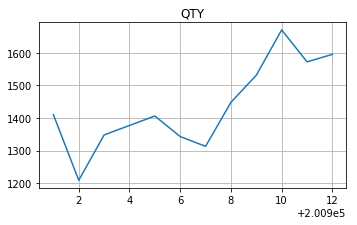

In [63]:
time_plot(s1)

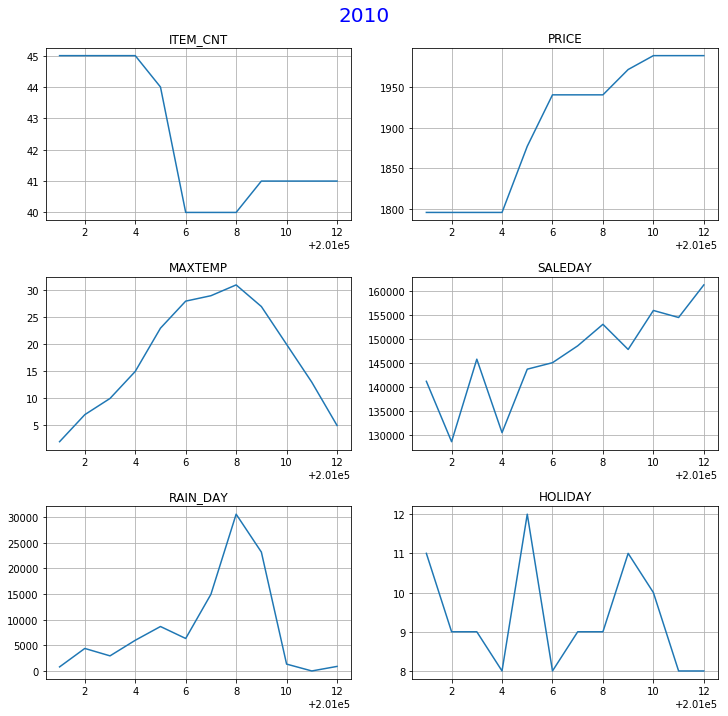

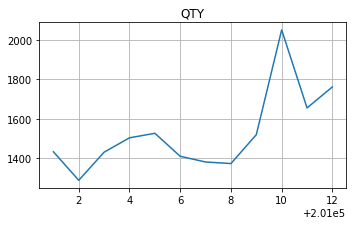

In [64]:
time_plot(s2)

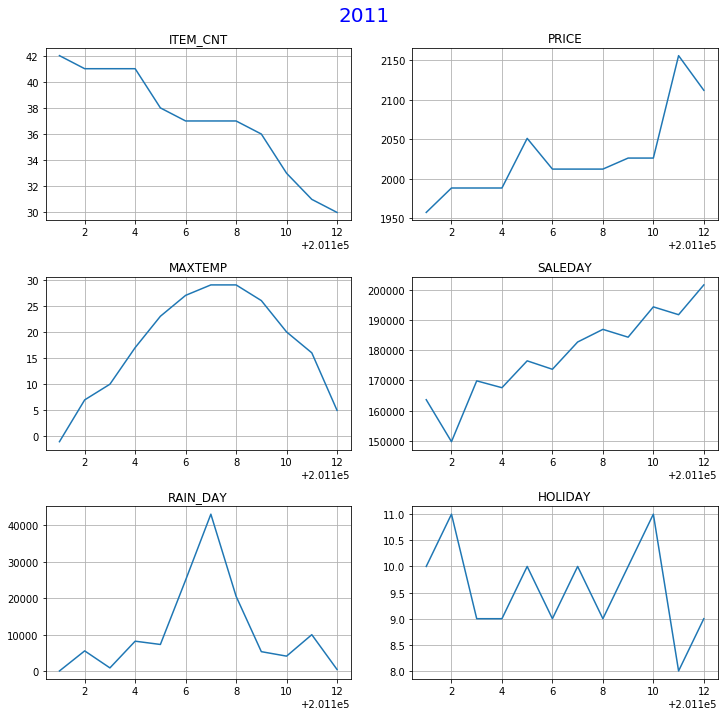

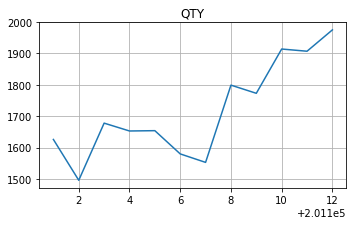

In [65]:
time_plot(s3)

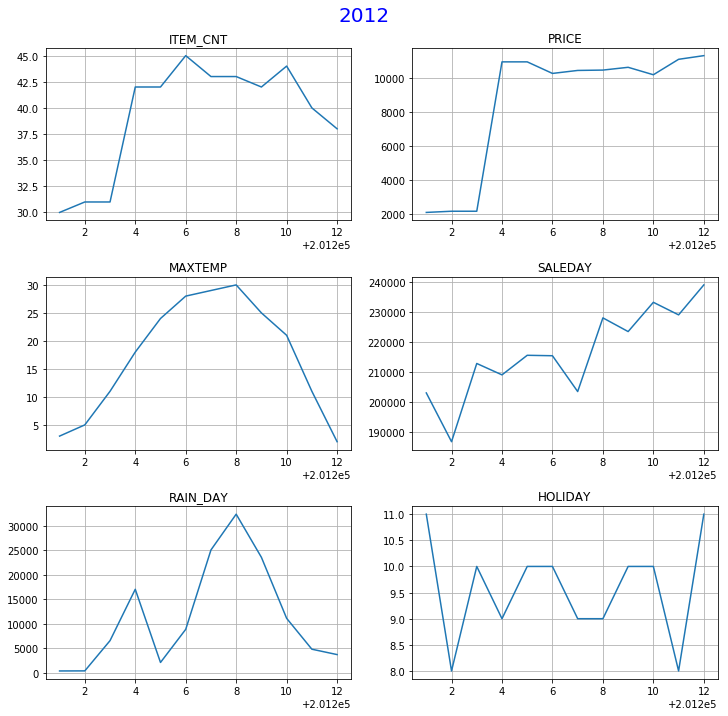

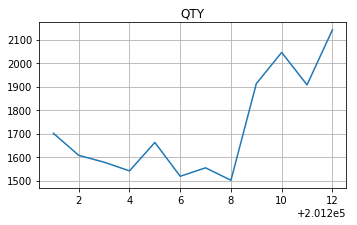

In [66]:
time_plot(s4)

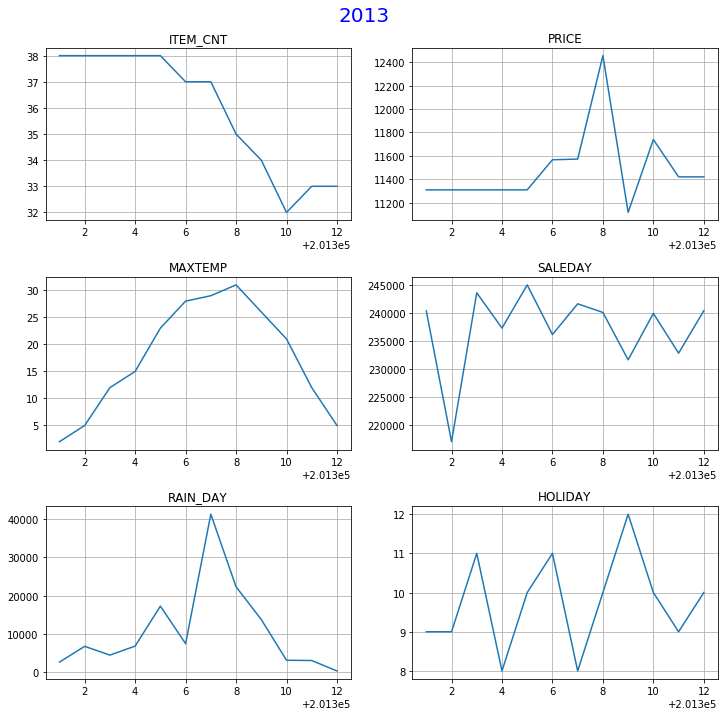

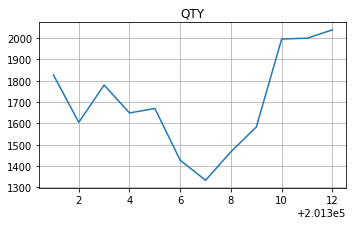

In [67]:
time_plot(s5)

- QTY Plot

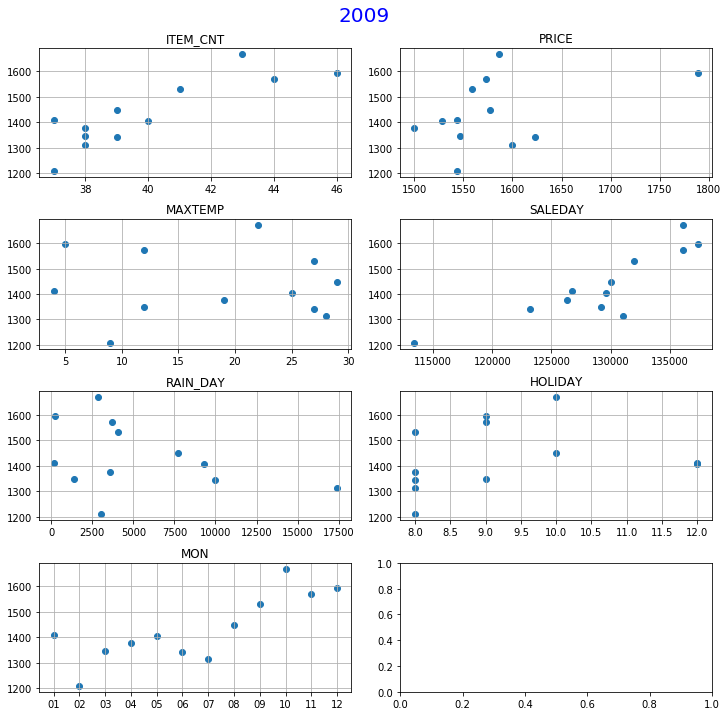

In [91]:
qty_plot(s1)

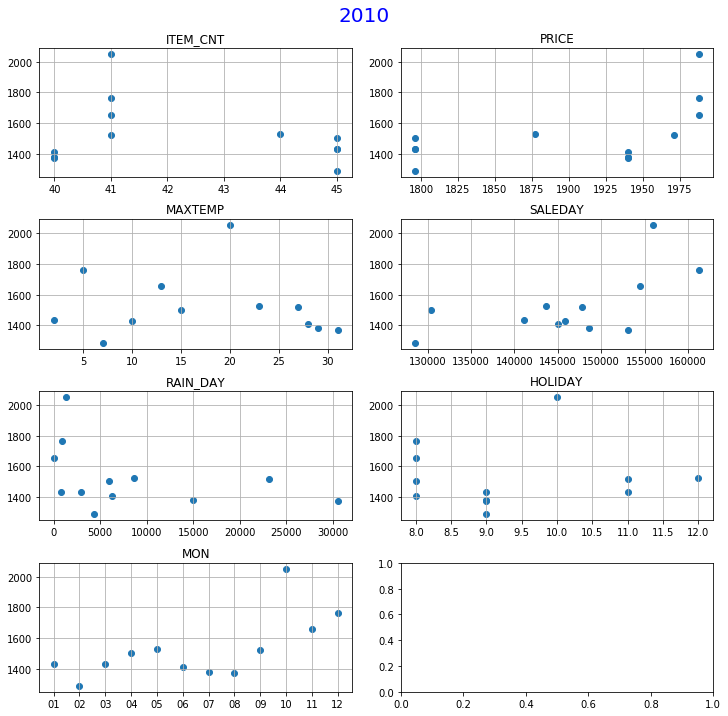

In [92]:
qty_plot(s2)

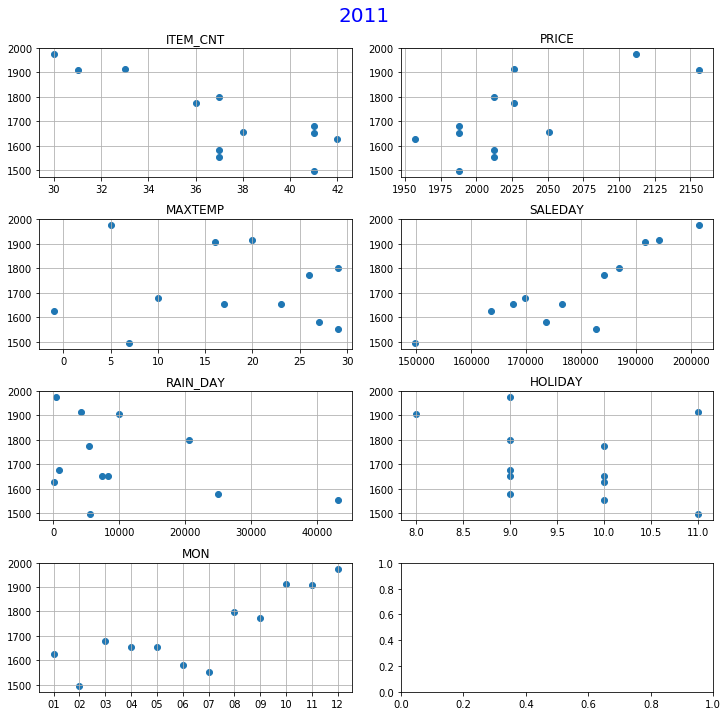

In [93]:
qty_plot(s3)

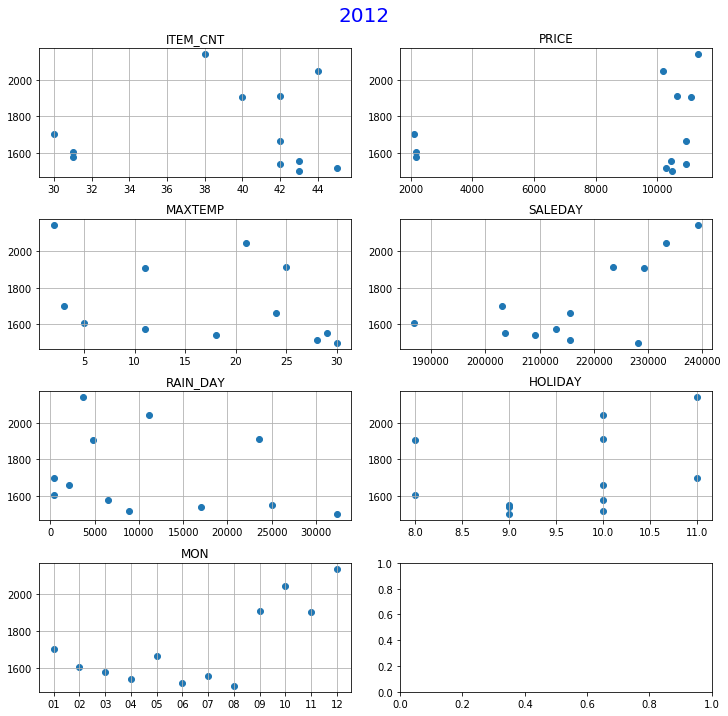

In [94]:
qty_plot(s4)

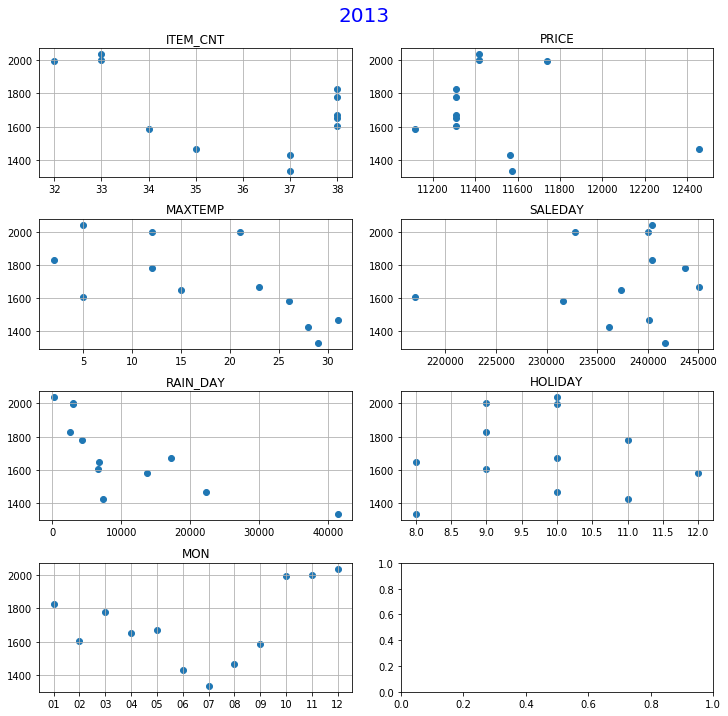

In [95]:
qty_plot(s5)

### Data Analysis

#### Normality Test

- Shapiro Test

In [73]:
weight, p_value = shapiro(Y)
print("[Weight: %.4f, P-value: %.4f]" % (weight, p_value))

[Weight: 0.9573, P-value: 0.0347]


- Plot

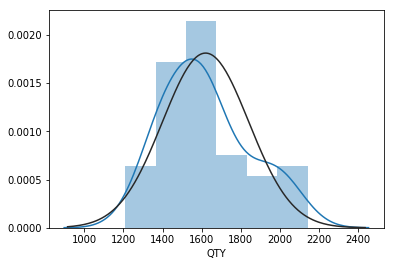

In [74]:
sns.distplot(Y, fit=stats.norm)
plt.show()

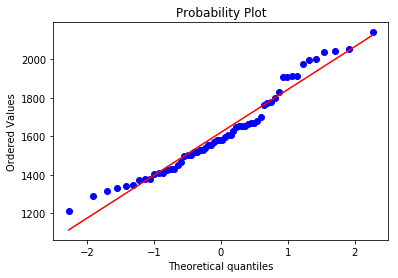

In [75]:
probplot(Y, plot=plt)
plt.show()

#### **Model 1**
 - Structure:  ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY = QTY

#### Divide Dataset into train and test

In [126]:
Y = sales['QTY']

In [140]:
X = sales.drop(['YM', 'QTY', 'CATEGORY', 'YEAR', 'MON'], axis=1)
X.head()

,ITEM_CNT,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
0,37,1543,4,126753,151,12
1,37,1543,9,113399,3014,8
2,38,1547,12,129162,1383,9
3,38,1500,19,126277,3564,8
4,40,1528,25,129584,9288,12


In [141]:
X = np.array(X, dtype=np.float32)

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=29)

In [143]:
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

#### Apply Regressions

In [147]:
model_type = ['lm', 'dt', 'svm', 'rf', 'ann']

regs1 = []
for m in model_type:
    regs1.append(apply_regs(x_train, y_train, x_test, y_test, model=m))

C:\Users\709-000\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\709-000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 17        
Total params: 7,233
Trainable params: 7,233
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
45/45 [==============================] - 0s 5ms/step - loss: 239230724.2667 - acc: 0.0000e+00
Epoch 2/2000
45/45 [=============

45/45 [==============================] - 0s 44us/step - loss: 49442.0773 - acc: 0.0000e+00
Epoch 69/2000
45/45 [==============================] - 0s 67us/step - loss: 138021.1042 - acc: 0.0000e+00
Epoch 70/2000
45/45 [==============================] - 0s 44us/step - loss: 114632.7715 - acc: 0.0000e+00
Epoch 71/2000
45/45 [==============================] - 0s 67us/step - loss: 113495.8286 - acc: 0.0000e+00
Epoch 72/2000
45/45 [==============================] - 0s 67us/step - loss: 77032.3212 - acc: 0.0000e+00
Epoch 73/2000
45/45 [==============================] - 0s 44us/step - loss: 71475.7047 - acc: 0.0000e+00
Epoch 74/2000
45/45 [==============================] - 0s 44us/step - loss: 77824.7364 - acc: 0.0000e+00
Epoch 75/2000
45/45 [==============================] - 0s 67us/step - loss: 41595.4041 - acc: 0.0000e+00
Epoch 76/2000
45/45 [==============================] - 0s 67us/step - loss: 44136.4179 - acc: 0.0000e+00
Epoch 77/2000
45/45 [==============================] - 0s 67us/ste

45/45 [==============================] - 0s 44us/step - loss: 94189.7870 - acc: 0.0000e+00
Epoch 146/2000
45/45 [==============================] - 0s 44us/step - loss: 113257.4628 - acc: 0.0000e+00
Epoch 147/2000
45/45 [==============================] - 0s 44us/step - loss: 79741.7970 - acc: 0.0000e+00
Epoch 148/2000
45/45 [==============================] - 0s 67us/step - loss: 51668.7490 - acc: 0.0000e+00
Epoch 149/2000
45/45 [==============================] - 0s 44us/step - loss: 76714.7542 - acc: 0.0000e+00
Epoch 150/2000
45/45 [==============================] - 0s 44us/step - loss: 106581.1606 - acc: 0.0000e+00
Epoch 151/2000
45/45 [==============================] - 0s 44us/step - loss: 76679.1045 - acc: 0.0000e+00
Epoch 152/2000
45/45 [==============================] - 0s 44us/step - loss: 59697.2411 - acc: 0.0000e+00
Epoch 153/2000
45/45 [==============================] - 0s 44us/step - loss: 82953.4184 - acc: 0.0000e+00
Epoch 154/2000
45/45 [==============================] - 0s 

45/45 [==============================] - 0s 67us/step - loss: 36872.8778 - acc: 0.0222
Epoch 223/2000
45/45 [==============================] - 0s 67us/step - loss: 35766.9566 - acc: 0.0000e+00
Epoch 224/2000
45/45 [==============================] - 0s 67us/step - loss: 79513.2116 - acc: 0.0000e+00
Epoch 225/2000
45/45 [==============================] - 0s 44us/step - loss: 160574.4083 - acc: 0.0000e+00
Epoch 226/2000
45/45 [==============================] - 0s 67us/step - loss: 63200.4018 - acc: 0.0000e+00
Epoch 227/2000
45/45 [==============================] - 0s 111us/step - loss: 51528.8797 - acc: 0.0000e+00
Epoch 228/2000
45/45 [==============================] - 0s 67us/step - loss: 33869.7821 - acc: 0.0000e+00
Epoch 229/2000
45/45 [==============================] - 0s 67us/step - loss: 31496.9237 - acc: 0.0000e+00
Epoch 230/2000
45/45 [==============================] - 0s 67us/step - loss: 56969.6115 - acc: 0.0000e+00
Epoch 231/2000
45/45 [==============================] - 0s 89us

45/45 [==============================] - 0s 44us/step - loss: 27637.5215 - acc: 0.0000e+00
Epoch 299/2000
45/45 [==============================] - 0s 44us/step - loss: 27375.9129 - acc: 0.0000e+00
Epoch 300/2000
45/45 [==============================] - 0s 44us/step - loss: 30395.8516 - acc: 0.0000e+00
Epoch 301/2000
45/45 [==============================] - 0s 44us/step - loss: 80625.6785 - acc: 0.0000e+00
Epoch 302/2000
45/45 [==============================] - 0s 44us/step - loss: 93752.0723 - acc: 0.0000e+00
Epoch 303/2000
45/45 [==============================] - 0s 44us/step - loss: 45634.2111 - acc: 0.0000e+00
Epoch 304/2000
45/45 [==============================] - 0s 44us/step - loss: 48427.6109 - acc: 0.0000e+00
Epoch 305/2000
45/45 [==============================] - ETA: 0s - loss: 55140.3281 - acc: 0.0000e+0 - 0s 67us/step - loss: 69585.2330 - acc: 0.0000e+00
Epoch 306/2000
45/45 [==============================] - 0s 67us/step - loss: 115129.7700 - acc: 0.0000e+00
Epoch 307/2000

45/45 [==============================] - 0s 44us/step - loss: 58155.8250 - acc: 0.0000e+00
Epoch 375/2000
45/45 [==============================] - 0s 44us/step - loss: 29133.8900 - acc: 0.0000e+00
Epoch 376/2000
45/45 [==============================] - 0s 67us/step - loss: 27744.5832 - acc: 0.0000e+00
Epoch 377/2000
45/45 [==============================] - 0s 67us/step - loss: 28939.4659 - acc: 0.0000e+00
Epoch 378/2000
45/45 [==============================] - 0s 44us/step - loss: 48965.5419 - acc: 0.0000e+00
Epoch 379/2000
45/45 [==============================] - 0s 44us/step - loss: 95132.6990 - acc: 0.0000e+00
Epoch 380/2000
45/45 [==============================] - 0s 67us/step - loss: 66453.8677 - acc: 0.0000e+00
Epoch 381/2000
45/45 [==============================] - 0s 44us/step - loss: 68656.1194 - acc: 0.0000e+00
Epoch 382/2000
45/45 [==============================] - 0s 44us/step - loss: 38318.3804 - acc: 0.0000e+00
Epoch 383/2000
45/45 [==============================] - 0s 44

45/45 [==============================] - 0s 67us/step - loss: 44472.5892 - acc: 0.0000e+00
Epoch 452/2000
45/45 [==============================] - 0s 67us/step - loss: 48509.4930 - acc: 0.0000e+00
Epoch 453/2000
45/45 [==============================] - 0s 44us/step - loss: 33579.2102 - acc: 0.0000e+00
Epoch 454/2000
45/45 [==============================] - 0s 44us/step - loss: 36936.7748 - acc: 0.0222
Epoch 455/2000
45/45 [==============================] - 0s 67us/step - loss: 30202.2583 - acc: 0.0000e+00
Epoch 456/2000
45/45 [==============================] - 0s 44us/step - loss: 31475.9503 - acc: 0.0000e+00
Epoch 457/2000
45/45 [==============================] - 0s 67us/step - loss: 66437.1259 - acc: 0.0000e+00
Epoch 458/2000
45/45 [==============================] - 0s 67us/step - loss: 112133.3839 - acc: 0.0000e+00
Epoch 459/2000
45/45 [==============================] - ETA: 0s - loss: 32324.5742 - acc: 0.0000e+0 - 0s 67us/step - loss: 36073.0926 - acc: 0.0000e+00
Epoch 460/2000
45/

45/45 [==============================] - 0s 44us/step - loss: 56831.1064 - acc: 0.0000e+00
Epoch 529/2000
45/45 [==============================] - 0s 44us/step - loss: 57560.4769 - acc: 0.0000e+00
Epoch 530/2000
45/45 [==============================] - 0s 44us/step - loss: 48479.6738 - acc: 0.0000e+00
Epoch 531/2000
45/45 [==============================] - 0s 67us/step - loss: 50246.8757 - acc: 0.0000e+00
Epoch 532/2000
45/45 [==============================] - 0s 67us/step - loss: 99357.4493 - acc: 0.0000e+00
Epoch 533/2000
45/45 [==============================] - 0s 44us/step - loss: 46002.7391 - acc: 0.0000e+00
Epoch 534/2000
45/45 [==============================] - 0s 44us/step - loss: 37567.2239 - acc: 0.0000e+00
Epoch 535/2000
45/45 [==============================] - 0s 44us/step - loss: 31543.6390 - acc: 0.0222
Epoch 536/2000
45/45 [==============================] - 0s 67us/step - loss: 50220.3281 - acc: 0.0000e+00
Epoch 537/2000
45/45 [==============================] - 0s 67us/s

45/45 [==============================] - 0s 44us/step - loss: 63573.2448 - acc: 0.0222
Epoch 606/2000
45/45 [==============================] - 0s 44us/step - loss: 52964.2476 - acc: 0.0000e+00
Epoch 607/2000
45/45 [==============================] - 0s 44us/step - loss: 55079.2336 - acc: 0.0000e+00
Epoch 608/2000
45/45 [==============================] - 0s 67us/step - loss: 35393.4908 - acc: 0.0000e+00
Epoch 609/2000
45/45 [==============================] - 0s 44us/step - loss: 28473.9584 - acc: 0.0000e+00
Epoch 610/2000
45/45 [==============================] - 0s 44us/step - loss: 71305.7493 - acc: 0.0000e+00
Epoch 611/2000
45/45 [==============================] - 0s 44us/step - loss: 108150.0446 - acc: 0.0000e+00
Epoch 612/2000
45/45 [==============================] - 0s 44us/step - loss: 50015.1885 - acc: 0.0000e+00
Epoch 613/2000
45/45 [==============================] - 0s 89us/step - loss: 32742.6225 - acc: 0.0000e+00
Epoch 614/2000
45/45 [==============================] - 0s 67us/

45/45 [==============================] - 0s 44us/step - loss: 44900.4399 - acc: 0.0000e+00
Epoch 683/2000
45/45 [==============================] - 0s 44us/step - loss: 45125.7948 - acc: 0.0000e+00
Epoch 684/2000
45/45 [==============================] - 0s 44us/step - loss: 49352.8114 - acc: 0.0000e+00
Epoch 685/2000
45/45 [==============================] - 0s 89us/step - loss: 44844.2661 - acc: 0.0000e+00
Epoch 686/2000
45/45 [==============================] - 0s 67us/step - loss: 113797.7905 - acc: 0.0000e+00
Epoch 687/2000
45/45 [==============================] - 0s 44us/step - loss: 37066.1903 - acc: 0.0000e+00
Epoch 688/2000
45/45 [==============================] - 0s 67us/step - loss: 33549.5157 - acc: 0.0000e+00
Epoch 689/2000
45/45 [==============================] - 0s 67us/step - loss: 74703.7998 - acc: 0.0000e+00
Epoch 690/2000
45/45 [==============================] - 0s 67us/step - loss: 72172.8384 - acc: 0.0000e+00
Epoch 691/2000
45/45 [==============================] - 0s 6

45/45 [==============================] - 0s 44us/step - loss: 46286.2310 - acc: 0.0000e+00
Epoch 760/2000
45/45 [==============================] - 0s 44us/step - loss: 27353.8169 - acc: 0.0000e+00
Epoch 761/2000
45/45 [==============================] - 0s 44us/step - loss: 40737.4726 - acc: 0.0000e+00
Epoch 762/2000
45/45 [==============================] - 0s 44us/step - loss: 69092.5081 - acc: 0.0000e+00
Epoch 763/2000
45/45 [==============================] - 0s 67us/step - loss: 33474.4579 - acc: 0.0000e+00
Epoch 764/2000
45/45 [==============================] - 0s 44us/step - loss: 26896.6026 - acc: 0.0000e+00
Epoch 765/2000
45/45 [==============================] - 0s 44us/step - loss: 28158.1688 - acc: 0.0000e+00
Epoch 766/2000
45/45 [==============================] - 0s 67us/step - loss: 28738.9634 - acc: 0.0000e+00
Epoch 767/2000
45/45 [==============================] - 0s 44us/step - loss: 31740.1812 - acc: 0.0000e+00
Epoch 768/2000
45/45 [==============================] - 0s 44

45/45 [==============================] - 0s 67us/step - loss: 52206.2443 - acc: 0.0222
Epoch 837/2000
45/45 [==============================] - 0s 44us/step - loss: 111030.6009 - acc: 0.0000e+00
Epoch 838/2000
45/45 [==============================] - 0s 44us/step - loss: 73247.7191 - acc: 0.0222
Epoch 839/2000
45/45 [==============================] - 0s 44us/step - loss: 42736.1294 - acc: 0.0000e+00
Epoch 840/2000
45/45 [==============================] - 0s 89us/step - loss: 27566.2068 - acc: 0.0000e+00
Epoch 841/2000
45/45 [==============================] - 0s 67us/step - loss: 32101.4652 - acc: 0.0000e+00
Epoch 842/2000
45/45 [==============================] - 0s 67us/step - loss: 57594.9625 - acc: 0.0000e+00
Epoch 843/2000
45/45 [==============================] - 0s 44us/step - loss: 29036.8043 - acc: 0.0000e+00
Epoch 844/2000
45/45 [==============================] - 0s 44us/step - loss: 30527.0341 - acc: 0.0000e+00
Epoch 845/2000
45/45 [==============================] - 0s 44us/step

45/45 [==============================] - 0s 44us/step - loss: 59561.3682 - acc: 0.0000e+00
Epoch 914/2000
45/45 [==============================] - 0s 44us/step - loss: 26728.4682 - acc: 0.0222
Epoch 915/2000
45/45 [==============================] - 0s 44us/step - loss: 38688.2787 - acc: 0.0000e+00
Epoch 916/2000
45/45 [==============================] - 0s 44us/step - loss: 56792.5411 - acc: 0.0000e+00
Epoch 917/2000
45/45 [==============================] - 0s 89us/step - loss: 53682.7378 - acc: 0.0000e+00
Epoch 918/2000
45/45 [==============================] - 0s 67us/step - loss: 29565.0493 - acc: 0.0000e+00
Epoch 919/2000
45/45 [==============================] - 0s 44us/step - loss: 40512.7893 - acc: 0.0000e+00
Epoch 920/2000
45/45 [==============================] - 0s 44us/step - loss: 126293.1576 - acc: 0.0000e+00
Epoch 921/2000
45/45 [==============================] - 0s 44us/step - loss: 152943.1972 - acc: 0.0000e+00
Epoch 922/2000
45/45 [==============================] - 0s 67us

45/45 [==============================] - 0s 22us/step - loss: 33131.6749 - acc: 0.0000e+00
Epoch 991/2000
45/45 [==============================] - 0s 44us/step - loss: 54484.8750 - acc: 0.0000e+00
Epoch 992/2000
45/45 [==============================] - 0s 89us/step - loss: 45940.9470 - acc: 0.0000e+00
Epoch 993/2000
45/45 [==============================] - 0s 44us/step - loss: 31621.0193 - acc: 0.0000e+00
Epoch 994/2000
45/45 [==============================] - 0s 67us/step - loss: 29202.4114 - acc: 0.0000e+00
Epoch 995/2000
45/45 [==============================] - 0s 67us/step - loss: 39860.7885 - acc: 0.0000e+00
Epoch 996/2000
45/45 [==============================] - 0s 67us/step - loss: 39655.9763 - acc: 0.0000e+00
Epoch 997/2000
45/45 [==============================] - 0s 44us/step - loss: 57219.0111 - acc: 0.0000e+00
Epoch 998/2000
45/45 [==============================] - 0s 67us/step - loss: 75059.9081 - acc: 0.0000e+00
Epoch 999/2000
45/45 [==============================] - 0s 44

45/45 [==============================] - 0s 44us/step - loss: 70070.8410 - acc: 0.0000e+00
Epoch 1067/2000
45/45 [==============================] - 0s 44us/step - loss: 55434.4283 - acc: 0.0000e+00
Epoch 1068/2000
45/45 [==============================] - 0s 44us/step - loss: 28905.1701 - acc: 0.0222
Epoch 1069/2000
45/45 [==============================] - 0s 67us/step - loss: 29400.0042 - acc: 0.0000e+00
Epoch 1070/2000
45/45 [==============================] - 0s 44us/step - loss: 26426.8946 - acc: 0.0000e+00
Epoch 1071/2000
45/45 [==============================] - 0s 44us/step - loss: 29399.7391 - acc: 0.0000e+00
Epoch 1072/2000
45/45 [==============================] - 0s 44us/step - loss: 29426.3942 - acc: 0.0000e+00
Epoch 1073/2000
45/45 [==============================] - 0s 44us/step - loss: 35231.6657 - acc: 0.0000e+00
Epoch 1074/2000
45/45 [==============================] - 0s 44us/step - loss: 67836.6656 - acc: 0.0000e+00
Epoch 1075/2000
45/45 [==============================] - 

45/45 [==============================] - 0s 67us/step - loss: 28803.1082 - acc: 0.0222
Epoch 1143/2000
45/45 [==============================] - 0s 44us/step - loss: 28519.7425 - acc: 0.0000e+00
Epoch 1144/2000
45/45 [==============================] - 0s 67us/step - loss: 32474.2079 - acc: 0.0000e+00
Epoch 1145/2000
45/45 [==============================] - 0s 44us/step - loss: 42936.6726 - acc: 0.0000e+00
Epoch 1146/2000
45/45 [==============================] - 0s 44us/step - loss: 26541.6470 - acc: 0.0000e+00
Epoch 1147/2000
45/45 [==============================] - 0s 44us/step - loss: 51436.3806 - acc: 0.0000e+00
Epoch 1148/2000
45/45 [==============================] - 0s 44us/step - loss: 97007.3285 - acc: 0.0000e+00
Epoch 1149/2000
45/45 [==============================] - 0s 67us/step - loss: 54011.5920 - acc: 0.0000e+00
Epoch 1150/2000
45/45 [==============================] - 0s 44us/step - loss: 30363.6252 - acc: 0.0000e+00
Epoch 1151/2000
45/45 [==============================] - 

45/45 [==============================] - 0s 67us/step - loss: 26602.5553 - acc: 0.0000e+00
Epoch 1219/2000
45/45 [==============================] - 0s 44us/step - loss: 26490.3360 - acc: 0.0222
Epoch 1220/2000
45/45 [==============================] - 0s 44us/step - loss: 34984.8790 - acc: 0.0000e+00
Epoch 1221/2000
45/45 [==============================] - 0s 67us/step - loss: 28140.9027 - acc: 0.0000e+00
Epoch 1222/2000
45/45 [==============================] - 0s 44us/step - loss: 27418.8247 - acc: 0.0000e+00
Epoch 1223/2000
45/45 [==============================] - 0s 67us/step - loss: 26162.5376 - acc: 0.0000e+00
Epoch 1224/2000
45/45 [==============================] - 0s 44us/step - loss: 29382.8715 - acc: 0.0000e+00
Epoch 1225/2000
45/45 [==============================] - 0s 44us/step - loss: 57824.1906 - acc: 0.0000e+00
Epoch 1226/2000
45/45 [==============================] - 0s 44us/step - loss: 83852.4158 - acc: 0.0000e+00
Epoch 1227/2000
45/45 [==============================] - 

Epoch 1294/2000
45/45 [==============================] - 0s 44us/step - loss: 80146.5068 - acc: 0.0000e+00
Epoch 1295/2000
45/45 [==============================] - 0s 89us/step - loss: 28533.5697 - acc: 0.0000e+00
Epoch 1296/2000
45/45 [==============================] - 0s 67us/step - loss: 29481.4429 - acc: 0.0000e+00
Epoch 1297/2000
45/45 [==============================] - 0s 67us/step - loss: 26369.7583 - acc: 0.0222
Epoch 1298/2000
45/45 [==============================] - 0s 44us/step - loss: 27715.4009 - acc: 0.0000e+00
Epoch 1299/2000
45/45 [==============================] - 0s 67us/step - loss: 38044.2296 - acc: 0.0000e+00
Epoch 1300/2000
45/45 [==============================] - 0s 67us/step - loss: 40385.2668 - acc: 0.0000e+00
Epoch 1301/2000
45/45 [==============================] - 0s 44us/step - loss: 34359.9596 - acc: 0.0000e+00
Epoch 1302/2000
45/45 [==============================] - 0s 44us/step - loss: 29153.0977 - acc: 0.0000e+00
Epoch 1303/2000
45/45 [==================

45/45 [==============================] - 0s 67us/step - loss: 26610.0148 - acc: 0.0000e+00
Epoch 1371/2000
45/45 [==============================] - 0s 44us/step - loss: 64968.8622 - acc: 0.0222
Epoch 1372/2000
45/45 [==============================] - 0s 67us/step - loss: 61213.9227 - acc: 0.0000e+00
Epoch 1373/2000
45/45 [==============================] - 0s 67us/step - loss: 30114.7256 - acc: 0.0000e+00
Epoch 1374/2000
45/45 [==============================] - 0s 67us/step - loss: 28334.0890 - acc: 0.0000e+00
Epoch 1375/2000
45/45 [==============================] - 0s 44us/step - loss: 41583.9745 - acc: 0.0000e+00
Epoch 1376/2000
45/45 [==============================] - 0s 67us/step - loss: 39920.1581 - acc: 0.0000e+00
Epoch 1377/2000
45/45 [==============================] - 0s 44us/step - loss: 50308.4587 - acc: 0.0000e+00
Epoch 1378/2000
45/45 [==============================] - 0s 67us/step - loss: 80194.2755 - acc: 0.0000e+00
Epoch 1379/2000
45/45 [==============================] - 

45/45 [==============================] - 0s 67us/step - loss: 26302.0720 - acc: 0.0000e+00
Epoch 1448/2000
45/45 [==============================] - 0s 44us/step - loss: 56889.9587 - acc: 0.0000e+00
Epoch 1449/2000
45/45 [==============================] - 0s 44us/step - loss: 59450.7320 - acc: 0.0000e+00
Epoch 1450/2000
45/45 [==============================] - 0s 44us/step - loss: 47309.8803 - acc: 0.0000e+00
Epoch 1451/2000
45/45 [==============================] - 0s 44us/step - loss: 29551.0309 - acc: 0.0000e+00
Epoch 1452/2000
45/45 [==============================] - 0s 67us/step - loss: 50379.2161 - acc: 0.0000e+00
Epoch 1453/2000
45/45 [==============================] - 0s 67us/step - loss: 63272.1467 - acc: 0.0000e+00
Epoch 1454/2000
45/45 [==============================] - 0s 67us/step - loss: 37718.1304 - acc: 0.0000e+00
Epoch 1455/2000
45/45 [==============================] - 0s 44us/step - loss: 27459.3009 - acc: 0.0000e+00
Epoch 1456/2000
45/45 [==============================

45/45 [==============================] - 0s 89us/step - loss: 88911.5632 - acc: 0.0000e+00
Epoch 1525/2000
45/45 [==============================] - 0s 44us/step - loss: 38808.2842 - acc: 0.0000e+00
Epoch 1526/2000
45/45 [==============================] - 0s 67us/step - loss: 26086.9486 - acc: 0.0000e+00
Epoch 1527/2000
45/45 [==============================] - 0s 67us/step - loss: 26659.0636 - acc: 0.0000e+00
Epoch 1528/2000
45/45 [==============================] - 0s 89us/step - loss: 29876.2303 - acc: 0.0000e+00
Epoch 1529/2000
45/45 [==============================] - 0s 44us/step - loss: 40056.2657 - acc: 0.0000e+00
Epoch 1530/2000
45/45 [==============================] - 0s 44us/step - loss: 52120.6920 - acc: 0.0000e+00
Epoch 1531/2000
45/45 [==============================] - 0s 44us/step - loss: 56543.5146 - acc: 0.0000e+00
Epoch 1532/2000
45/45 [==============================] - 0s 44us/step - loss: 26254.2298 - acc: 0.0000e+00
Epoch 1533/2000
45/45 [==============================

45/45 [==============================] - 0s 44us/step - loss: 26638.9428 - acc: 0.0000e+00
Epoch 1602/2000
45/45 [==============================] - 0s 44us/step - loss: 31854.7898 - acc: 0.0000e+00
Epoch 1603/2000
45/45 [==============================] - 0s 44us/step - loss: 32307.0250 - acc: 0.0000e+00
Epoch 1604/2000
45/45 [==============================] - 0s 44us/step - loss: 35057.7432 - acc: 0.0000e+00
Epoch 1605/2000
45/45 [==============================] - 0s 44us/step - loss: 46877.6250 - acc: 0.0000e+00
Epoch 1606/2000
45/45 [==============================] - 0s 44us/step - loss: 35767.1164 - acc: 0.0000e+00
Epoch 1607/2000
45/45 [==============================] - 0s 44us/step - loss: 37101.1252 - acc: 0.0000e+00
Epoch 1608/2000
45/45 [==============================] - 0s 67us/step - loss: 42529.1441 - acc: 0.0000e+00
Epoch 1609/2000
45/45 [==============================] - 0s 67us/step - loss: 38084.7641 - acc: 0.0000e+00
Epoch 1610/2000
45/45 [==============================

45/45 [==============================] - 0s 89us/step - loss: 28140.1831 - acc: 0.0000e+00
Epoch 1678/2000
45/45 [==============================] - 0s 44us/step - loss: 28207.3183 - acc: 0.0000e+00
Epoch 1679/2000
45/45 [==============================] - 0s 44us/step - loss: 28077.6395 - acc: 0.0000e+00
Epoch 1680/2000
45/45 [==============================] - 0s 67us/step - loss: 30386.3388 - acc: 0.0000e+00
Epoch 1681/2000
45/45 [==============================] - 0s 67us/step - loss: 64336.7066 - acc: 0.0000e+00
Epoch 1682/2000
45/45 [==============================] - 0s 44us/step - loss: 45752.6079 - acc: 0.0000e+00
Epoch 1683/2000
45/45 [==============================] - 0s 44us/step - loss: 33395.9512 - acc: 0.0000e+00
Epoch 1684/2000
45/45 [==============================] - 0s 44us/step - loss: 27782.2854 - acc: 0.0000e+00
Epoch 1685/2000
45/45 [==============================] - 0s 89us/step - loss: 35401.8317 - acc: 0.0000e+00
Epoch 1686/2000
45/45 [==============================

Epoch 1754/2000
45/45 [==============================] - 0s 44us/step - loss: 28395.9829 - acc: 0.0000e+00
Epoch 1755/2000
45/45 [==============================] - 0s 44us/step - loss: 27507.2851 - acc: 0.0000e+00
Epoch 1756/2000
45/45 [==============================] - 0s 44us/step - loss: 29973.0964 - acc: 0.0000e+00
Epoch 1757/2000
45/45 [==============================] - 0s 67us/step - loss: 52610.4314 - acc: 0.0000e+00
Epoch 1758/2000
45/45 [==============================] - 0s 44us/step - loss: 66367.7280 - acc: 0.0000e+00
Epoch 1759/2000
45/45 [==============================] - 0s 44us/step - loss: 40001.8711 - acc: 0.0000e+00
Epoch 1760/2000
45/45 [==============================] - 0s 44us/step - loss: 40004.8554 - acc: 0.0444
Epoch 1761/2000
45/45 [==============================] - 0s 44us/step - loss: 29982.3794 - acc: 0.0000e+00
Epoch 1762/2000
45/45 [==============================] - 0s 44us/step - loss: 30720.8082 - acc: 0.0000e+00
Epoch 1763/2000
45/45 [==================

45/45 [==============================] - 0s 44us/step - loss: 26396.5931 - acc: 0.0000e+00
Epoch 1831/2000
45/45 [==============================] - 0s 67us/step - loss: 34259.1339 - acc: 0.0000e+00
Epoch 1832/2000
45/45 [==============================] - 0s 44us/step - loss: 27682.2863 - acc: 0.0000e+00
Epoch 1833/2000
45/45 [==============================] - 0s 44us/step - loss: 27966.9534 - acc: 0.0000e+00
Epoch 1834/2000
45/45 [==============================] - 0s 67us/step - loss: 26050.0348 - acc: 0.0000e+00
Epoch 1835/2000
45/45 [==============================] - 0s 67us/step - loss: 44751.7431 - acc: 0.0000e+00
Epoch 1836/2000
45/45 [==============================] - 0s 67us/step - loss: 77900.3995 - acc: 0.0000e+00
Epoch 1837/2000
45/45 [==============================] - 0s 44us/step - loss: 53689.6281 - acc: 0.0000e+00
Epoch 1838/2000
45/45 [==============================] - 0s 44us/step - loss: 27327.5754 - acc: 0.0000e+00
Epoch 1839/2000
45/45 [==============================

45/45 [==============================] - 0s 44us/step - loss: 31483.4714 - acc: 0.0000e+00
Epoch 1907/2000
45/45 [==============================] - 0s 67us/step - loss: 26917.1230 - acc: 0.0000e+00
Epoch 1908/2000
45/45 [==============================] - 0s 67us/step - loss: 28124.0931 - acc: 0.0000e+00
Epoch 1909/2000
45/45 [==============================] - 0s 67us/step - loss: 30596.9585 - acc: 0.0000e+00
Epoch 1910/2000
45/45 [==============================] - 0s 67us/step - loss: 30819.7639 - acc: 0.0000e+00
Epoch 1911/2000
45/45 [==============================] - 0s 44us/step - loss: 52799.4342 - acc: 0.0222
Epoch 1912/2000
45/45 [==============================] - 0s 44us/step - loss: 43359.3766 - acc: 0.0000e+00
Epoch 1913/2000
45/45 [==============================] - 0s 44us/step - loss: 28065.4886 - acc: 0.0000e+00
Epoch 1914/2000
45/45 [==============================] - 0s 67us/step - loss: 33832.3050 - acc: 0.0000e+00
Epoch 1915/2000
45/45 [==============================] - 

45/45 [==============================] - 0s 67us/step - loss: 32974.4075 - acc: 0.0222
Epoch 1984/2000
45/45 [==============================] - 0s 44us/step - loss: 41953.1499 - acc: 0.0000e+00
Epoch 1985/2000
45/45 [==============================] - 0s 44us/step - loss: 38765.1575 - acc: 0.0000e+00
Epoch 1986/2000
45/45 [==============================] - 0s 44us/step - loss: 27025.0367 - acc: 0.0000e+00
Epoch 1987/2000
45/45 [==============================] - 0s 67us/step - loss: 27411.8849 - acc: 0.0000e+00
Epoch 1988/2000
45/45 [==============================] - 0s 44us/step - loss: 49123.9061 - acc: 0.0000e+00
Epoch 1989/2000
45/45 [==============================] - 0s 44us/step - loss: 46948.4561 - acc: 0.0222
Epoch 1990/2000
45/45 [==============================] - 0s 44us/step - loss: 50722.6198 - acc: 0.0000e+00
Epoch 1991/2000
45/45 [==============================] - 0s 44us/step - loss: 37541.3436 - acc: 0.0000e+00
Epoch 1992/2000
45/45 [==============================] - 0s 6

#### Model Evaluation

In [180]:
for reg in regs1:
    print(f"[ Model: {reg[0]:25} | RMSE: {reg[3]:.4f} ]")

[ Model: LinearRegression          | RMSE: 143.4655 ]
[ Model: DecisionTreeRegressor     | RMSE: 208.3419 ]
[ Model: SVC                       | RMSE: 573.4046 ]
[ Model: RandomForestRegressor     | RMSE: 167.4118 ]
[ Model: ArtificialNeuralNetwork   | RMSE: 208.7025 ]


In [183]:
table1 = view_table(regs1)
table1

,Regression,RMSE
1,LinearRegression,143.47
2,DecisionTreeRegressor,208.34
3,SVC,573.40
4,RandomForestRegressor,167.41
5,ArtificialNeuralNetwork,208.70


#### **Model 2**
 - Structure:  ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY + **MON** = QTY

In [150]:
X = sales.drop(['YM', 'QTY', 'CATEGORY', 'YEAR'], axis=1)
X.head()

,ITEM_CNT,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY,MON
0,37,1543,4,126753,151,12,01
1,37,1543,9,113399,3014,8,02
2,38,1547,12,129162,1383,9,03
3,38,1500,19,126277,3564,8,04
4,40,1528,25,129584,9288,12,05


In [151]:
X = np.array(X, dtype=np.float32)

In [152]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=29)

In [153]:
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [154]:
model_type = ['lm', 'dt', 'svm', 'rf', 'ann']

regs2 = []
for m in model_type:
    regs2.append(apply_regs(x_train, y_train, x_test, y_test, model=m))

C:\Users\709-000\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\709-000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 17        
Total params: 7,297
Trainable params: 7,297
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
45/45 [==============================] - 0s 5ms/step - loss: 139005455.6444 - acc: 0.0000e+00
Epoch 2/2000
45/45 [=============

45/45 [==============================] - 0s 44us/step - loss: 115540.6918 - acc: 0.0000e+00
Epoch 69/2000
45/45 [==============================] - 0s 44us/step - loss: 98337.8311 - acc: 0.0000e+00
Epoch 70/2000
45/45 [==============================] - 0s 67us/step - loss: 130951.2375 - acc: 0.0000e+00
Epoch 71/2000
45/45 [==============================] - 0s 44us/step - loss: 192615.9688 - acc: 0.0000e+00
Epoch 72/2000
45/45 [==============================] - 0s 44us/step - loss: 118736.4111 - acc: 0.0000e+00
Epoch 73/2000
45/45 [==============================] - 0s 67us/step - loss: 88459.2052 - acc: 0.0000e+00
Epoch 74/2000
45/45 [==============================] - 0s 89us/step - loss: 89838.1076 - acc: 0.0000e+00
Epoch 75/2000
45/45 [==============================] - 0s 67us/step - loss: 101337.7711 - acc: 0.0000e+00
Epoch 76/2000
45/45 [==============================] - 0s 44us/step - loss: 111624.8118 - acc: 0.0000e+00
Epoch 77/2000
45/45 [==============================] - 0s 67us/

Epoch 145/2000
45/45 [==============================] - 0s 44us/step - loss: 58518.1651 - acc: 0.0000e+00
Epoch 146/2000
45/45 [==============================] - 0s 67us/step - loss: 67110.1507 - acc: 0.0000e+00
Epoch 147/2000
45/45 [==============================] - 0s 44us/step - loss: 99902.2191 - acc: 0.0222
Epoch 148/2000
45/45 [==============================] - 0s 44us/step - loss: 62809.4060 - acc: 0.0000e+00
Epoch 149/2000
45/45 [==============================] - 0s 44us/step - loss: 62930.1886 - acc: 0.0000e+00
Epoch 150/2000
45/45 [==============================] - 0s 44us/step - loss: 56523.6582 - acc: 0.0000e+00
Epoch 151/2000
45/45 [==============================] - 0s 67us/step - loss: 135664.0847 - acc: 0.0000e+00
Epoch 152/2000
45/45 [==============================] - 0s 89us/step - loss: 107304.0549 - acc: 0.0000e+00
Epoch 153/2000
45/45 [==============================] - 0s 67us/step - loss: 66624.3279 - acc: 0.0222
Epoch 154/2000
45/45 [==============================

45/45 [==============================] - 0s 44us/step - loss: 59700.3076 - acc: 0.0000e+00
Epoch 223/2000
45/45 [==============================] - 0s 44us/step - loss: 56388.5040 - acc: 0.0000e+00
Epoch 224/2000
45/45 [==============================] - 0s 67us/step - loss: 48570.2784 - acc: 0.0000e+00
Epoch 225/2000
45/45 [==============================] - 0s 67us/step - loss: 45603.9391 - acc: 0.0000e+00
Epoch 226/2000
45/45 [==============================] - 0s 67us/step - loss: 77350.2656 - acc: 0.0000e+00
Epoch 227/2000
45/45 [==============================] - 0s 44us/step - loss: 100742.9004 - acc: 0.0000e+00
Epoch 228/2000
45/45 [==============================] - 0s 44us/step - loss: 45164.0599 - acc: 0.0000e+00
Epoch 229/2000
45/45 [==============================] - 0s 44us/step - loss: 53371.1004 - acc: 0.0000e+00
Epoch 230/2000
45/45 [==============================] - 0s 44us/step - loss: 68206.2946 - acc: 0.0000e+00
Epoch 231/2000
45/45 [==============================] - 0s 4

45/45 [==============================] - 0s 44us/step - loss: 44880.6713 - acc: 0.0000e+00
Epoch 300/2000
45/45 [==============================] - 0s 44us/step - loss: 91241.3955 - acc: 0.0000e+00
Epoch 301/2000
45/45 [==============================] - 0s 89us/step - loss: 50236.8099 - acc: 0.0000e+00
Epoch 302/2000
45/45 [==============================] - 0s 67us/step - loss: 40022.6666 - acc: 0.0000e+00
Epoch 303/2000
45/45 [==============================] - 0s 44us/step - loss: 39557.5690 - acc: 0.0000e+00
Epoch 304/2000
45/45 [==============================] - 0s 44us/step - loss: 42220.1102 - acc: 0.0000e+00
Epoch 305/2000
45/45 [==============================] - 0s 44us/step - loss: 72789.0833 - acc: 0.0000e+00
Epoch 306/2000
45/45 [==============================] - 0s 44us/step - loss: 54911.8072 - acc: 0.0000e+00
Epoch 307/2000
45/45 [==============================] - 0s 44us/step - loss: 49266.1661 - acc: 0.0000e+00
Epoch 308/2000
45/45 [==============================] - 0s 44

45/45 [==============================] - 0s 67us/step - loss: 39446.1637 - acc: 0.0000e+00
Epoch 377/2000
45/45 [==============================] - 0s 89us/step - loss: 37917.5693 - acc: 0.0000e+00
Epoch 378/2000
45/45 [==============================] - 0s 44us/step - loss: 55663.1162 - acc: 0.0000e+00
Epoch 379/2000
45/45 [==============================] - 0s 67us/step - loss: 45141.9629 - acc: 0.0000e+00
Epoch 380/2000
45/45 [==============================] - 0s 44us/step - loss: 41125.5052 - acc: 0.0000e+00
Epoch 381/2000
45/45 [==============================] - 0s 67us/step - loss: 45633.1169 - acc: 0.0000e+00
Epoch 382/2000
45/45 [==============================] - 0s 67us/step - loss: 52735.6092 - acc: 0.0222
Epoch 383/2000
45/45 [==============================] - 0s 67us/step - loss: 91903.7872 - acc: 0.0222
Epoch 384/2000
45/45 [==============================] - 0s 44us/step - loss: 36046.7503 - acc: 0.0000e+00
Epoch 385/2000
45/45 [==============================] - 0s 44us/step 

45/45 [==============================] - 0s 44us/step - loss: 37088.8749 - acc: 0.0000e+00
Epoch 454/2000
45/45 [==============================] - 0s 44us/step - loss: 55901.4693 - acc: 0.0000e+00
Epoch 455/2000
45/45 [==============================] - 0s 44us/step - loss: 49500.0474 - acc: 0.0000e+00
Epoch 456/2000
45/45 [==============================] - 0s 67us/step - loss: 33111.1994 - acc: 0.0222
Epoch 457/2000
45/45 [==============================] - 0s 44us/step - loss: 67593.0139 - acc: 0.0222
Epoch 458/2000
45/45 [==============================] - 0s 44us/step - loss: 36481.1447 - acc: 0.0000e+00
Epoch 459/2000
45/45 [==============================] - 0s 44us/step - loss: 34177.1725 - acc: 0.0222
Epoch 460/2000
45/45 [==============================] - 0s 44us/step - loss: 33172.6897 - acc: 0.0000e+00
Epoch 461/2000
45/45 [==============================] - 0s 44us/step - loss: 34694.9852 - acc: 0.0000e+00
Epoch 462/2000
45/45 [==============================] - 0s 67us/step - lo

45/45 [==============================] - 0s 44us/step - loss: 32072.2970 - acc: 0.0222
Epoch 531/2000
45/45 [==============================] - 0s 67us/step - loss: 31395.7112 - acc: 0.0000e+00
Epoch 532/2000
45/45 [==============================] - 0s 67us/step - loss: 32071.1922 - acc: 0.0000e+00
Epoch 533/2000
45/45 [==============================] - 0s 67us/step - loss: 42697.2753 - acc: 0.0222
Epoch 534/2000
45/45 [==============================] - 0s 67us/step - loss: 135763.3166 - acc: 0.0000e+00
Epoch 535/2000
45/45 [==============================] - 0s 67us/step - loss: 31514.3336 - acc: 0.0000e+00
Epoch 536/2000
45/45 [==============================] - 0s 67us/step - loss: 31802.6940 - acc: 0.0000e+00
Epoch 537/2000
45/45 [==============================] - 0s 67us/step - loss: 35378.5637 - acc: 0.0000e+00
Epoch 538/2000
45/45 [==============================] - 0s 67us/step - loss: 35071.6701 - acc: 0.0000e+00
Epoch 539/2000
45/45 [==============================] - 0s 44us/step

45/45 [==============================] - 0s 44us/step - loss: 30859.7673 - acc: 0.0000e+00
Epoch 608/2000
45/45 [==============================] - 0s 67us/step - loss: 43415.1359 - acc: 0.0000e+00
Epoch 609/2000
45/45 [==============================] - 0s 67us/step - loss: 83729.2804 - acc: 0.0000e+00
Epoch 610/2000
45/45 [==============================] - 0s 67us/step - loss: 31685.0967 - acc: 0.0000e+00
Epoch 611/2000
45/45 [==============================] - 0s 89us/step - loss: 31004.9470 - acc: 0.0000e+00
Epoch 612/2000
45/45 [==============================] - 0s 44us/step - loss: 66728.8446 - acc: 0.0000e+00
Epoch 613/2000
45/45 [==============================] - 0s 44us/step - loss: 36286.4954 - acc: 0.0000e+00
Epoch 614/2000
45/45 [==============================] - 0s 44us/step - loss: 31903.4207 - acc: 0.0000e+00
Epoch 615/2000
45/45 [==============================] - 0s 67us/step - loss: 44540.2286 - acc: 0.0000e+00
Epoch 616/2000
45/45 [==============================] - 0s 67

45/45 [==============================] - 0s 44us/step - loss: 49115.0927 - acc: 0.0000e+00
Epoch 685/2000
45/45 [==============================] - 0s 89us/step - loss: 76534.5823 - acc: 0.0000e+00
Epoch 686/2000
45/45 [==============================] - 0s 44us/step - loss: 44865.0935 - acc: 0.0000e+00
Epoch 687/2000
45/45 [==============================] - 0s 44us/step - loss: 54785.2636 - acc: 0.0000e+00
Epoch 688/2000
45/45 [==============================] - 0s 44us/step - loss: 54600.5016 - acc: 0.0000e+00
Epoch 689/2000
45/45 [==============================] - 0s 67us/step - loss: 49256.7740 - acc: 0.0000e+00
Epoch 690/2000
45/45 [==============================] - 0s 44us/step - loss: 49644.4302 - acc: 0.0000e+00
Epoch 691/2000
45/45 [==============================] - 0s 44us/step - loss: 32205.4210 - acc: 0.0000e+00
Epoch 692/2000
45/45 [==============================] - 0s 44us/step - loss: 62147.5138 - acc: 0.0000e+00
Epoch 693/2000
45/45 [==============================] - 0s 44

45/45 [==============================] - 0s 67us/step - loss: 37294.5044 - acc: 0.0000e+00
Epoch 762/2000
45/45 [==============================] - 0s 44us/step - loss: 30050.4705 - acc: 0.0000e+00
Epoch 763/2000
45/45 [==============================] - 0s 67us/step - loss: 30111.8217 - acc: 0.0000e+00
Epoch 764/2000
45/45 [==============================] - 0s 67us/step - loss: 30153.1668 - acc: 0.0000e+00
Epoch 765/2000
45/45 [==============================] - 0s 44us/step - loss: 29325.6360 - acc: 0.0000e+00
Epoch 766/2000
45/45 [==============================] - 0s 67us/step - loss: 57057.9417 - acc: 0.0222
Epoch 767/2000
45/45 [==============================] - 0s 44us/step - loss: 68550.2052 - acc: 0.0000e+00
Epoch 768/2000
45/45 [==============================] - 0s 44us/step - loss: 87750.7885 - acc: 0.0000e+00
Epoch 769/2000
45/45 [==============================] - 0s 44us/step - loss: 43698.4882 - acc: 0.0000e+00
Epoch 770/2000
45/45 [==============================] - 0s 44us/s

45/45 [==============================] - 0s 44us/step - loss: 53171.0968 - acc: 0.0000e+00
Epoch 839/2000
45/45 [==============================] - 0s 44us/step - loss: 45934.7115 - acc: 0.0000e+00
Epoch 840/2000
45/45 [==============================] - 0s 67us/step - loss: 41441.9833 - acc: 0.0000e+00
Epoch 841/2000
45/45 [==============================] - 0s 67us/step - loss: 39647.7570 - acc: 0.0000e+00
Epoch 842/2000
45/45 [==============================] - 0s 67us/step - loss: 31396.0355 - acc: 0.0000e+00
Epoch 843/2000
45/45 [==============================] - 0s 44us/step - loss: 32271.5308 - acc: 0.0000e+00
Epoch 844/2000
45/45 [==============================] - 0s 44us/step - loss: 32852.6970 - acc: 0.0000e+00
Epoch 845/2000
45/45 [==============================] - 0s 44us/step - loss: 35423.1609 - acc: 0.0000e+00
Epoch 846/2000
45/45 [==============================] - 0s 44us/step - loss: 30537.6192 - acc: 0.0000e+00
Epoch 847/2000
45/45 [==============================] - 0s 44

45/45 [==============================] - 0s 67us/step - loss: 30166.8881 - acc: 0.0000e+00
Epoch 916/2000
45/45 [==============================] - 0s 44us/step - loss: 34055.2144 - acc: 0.0000e+00
Epoch 917/2000
45/45 [==============================] - 0s 44us/step - loss: 38066.3030 - acc: 0.0000e+00
Epoch 918/2000
45/45 [==============================] - 0s 44us/step - loss: 44907.6671 - acc: 0.0000e+00
Epoch 919/2000
45/45 [==============================] - 0s 44us/step - loss: 38232.5736 - acc: 0.0000e+00
Epoch 920/2000
45/45 [==============================] - 0s 89us/step - loss: 45970.0639 - acc: 0.0000e+00
Epoch 921/2000
45/45 [==============================] - 0s 67us/step - loss: 79975.0358 - acc: 0.0000e+00
Epoch 922/2000
45/45 [==============================] - 0s 44us/step - loss: 40949.4797 - acc: 0.0000e+00
Epoch 923/2000
45/45 [==============================] - 0s 67us/step - loss: 52917.3356 - acc: 0.0222
Epoch 924/2000
45/45 [==============================] - 0s 44us/s

45/45 [==============================] - 0s 89us/step - loss: 43909.2115 - acc: 0.0000e+00
Epoch 993/2000
45/45 [==============================] - 0s 44us/step - loss: 43692.0648 - acc: 0.0000e+00
Epoch 994/2000
45/45 [==============================] - 0s 44us/step - loss: 31949.1814 - acc: 0.0000e+00
Epoch 995/2000
45/45 [==============================] - 0s 44us/step - loss: 29935.2874 - acc: 0.0000e+00
Epoch 996/2000
45/45 [==============================] - 0s 44us/step - loss: 38981.8405 - acc: 0.0000e+00
Epoch 997/2000
45/45 [==============================] - 0s 67us/step - loss: 33067.4318 - acc: 0.0000e+00
Epoch 998/2000
45/45 [==============================] - 0s 89us/step - loss: 31559.7387 - acc: 0.0000e+00
Epoch 999/2000
45/45 [==============================] - 0s 67us/step - loss: 31407.1221 - acc: 0.0222
Epoch 1000/2000
45/45 [==============================] - 0s 67us/step - loss: 30334.4519 - acc: 0.0000e+00
Epoch 1001/2000
45/45 [==============================] - 0s 67us

45/45 [==============================] - 0s 67us/step - loss: 41775.1168 - acc: 0.0000e+00
Epoch 1070/2000
45/45 [==============================] - 0s 44us/step - loss: 84670.4528 - acc: 0.0000e+00
Epoch 1071/2000
45/45 [==============================] - 0s 67us/step - loss: 69243.6876 - acc: 0.0000e+00
Epoch 1072/2000
45/45 [==============================] - 0s 67us/step - loss: 50282.7852 - acc: 0.0000e+00
Epoch 1073/2000
45/45 [==============================] - 0s 67us/step - loss: 34445.5168 - acc: 0.0000e+00
Epoch 1074/2000
45/45 [==============================] - 0s 44us/step - loss: 30841.4791 - acc: 0.0000e+00
Epoch 1075/2000
45/45 [==============================] - 0s 44us/step - loss: 37102.5638 - acc: 0.0000e+00
Epoch 1076/2000
45/45 [==============================] - 0s 67us/step - loss: 58642.7385 - acc: 0.0000e+00
Epoch 1077/2000
45/45 [==============================] - 0s 67us/step - loss: 44906.4874 - acc: 0.0000e+00
Epoch 1078/2000
45/45 [==============================

45/45 [==============================] - 0s 67us/step - loss: 33773.8245 - acc: 0.0000e+00
Epoch 1146/2000
45/45 [==============================] - 0s 44us/step - loss: 29072.8954 - acc: 0.0000e+00
Epoch 1147/2000
45/45 [==============================] - 0s 44us/step - loss: 28953.8384 - acc: 0.0000e+00
Epoch 1148/2000
45/45 [==============================] - 0s 67us/step - loss: 57779.5913 - acc: 0.0000e+00
Epoch 1149/2000
45/45 [==============================] - 0s 67us/step - loss: 102895.2325 - acc: 0.0000e+00
Epoch 1150/2000
45/45 [==============================] - 0s 44us/step - loss: 44458.4912 - acc: 0.0000e+00
Epoch 1151/2000
45/45 [==============================] - 0s 44us/step - loss: 30952.7294 - acc: 0.0000e+00
Epoch 1152/2000
45/45 [==============================] - 0s 67us/step - loss: 30357.9208 - acc: 0.0000e+00
Epoch 1153/2000
45/45 [==============================] - 0s 44us/step - loss: 29355.1434 - acc: 0.0000e+00
Epoch 1154/2000
45/45 [=============================

45/45 [==============================] - 0s 22us/step - loss: 61873.0845 - acc: 0.0000e+00
Epoch 1222/2000
45/45 [==============================] - 0s 67us/step - loss: 33494.2569 - acc: 0.0000e+00
Epoch 1223/2000
45/45 [==============================] - 0s 44us/step - loss: 29199.8684 - acc: 0.0000e+00
Epoch 1224/2000
45/45 [==============================] - 0s 67us/step - loss: 38548.7338 - acc: 0.0000e+00
Epoch 1225/2000
45/45 [==============================] - 0s 67us/step - loss: 32886.5867 - acc: 0.0222
Epoch 1226/2000
45/45 [==============================] - 0s 44us/step - loss: 33578.6961 - acc: 0.0000e+00
Epoch 1227/2000
45/45 [==============================] - 0s 44us/step - loss: 29900.0051 - acc: 0.0222
Epoch 1228/2000
45/45 [==============================] - 0s 44us/step - loss: 36710.0819 - acc: 0.0000e+00
Epoch 1229/2000
45/45 [==============================] - 0s 89us/step - loss: 42537.9773 - acc: 0.0000e+00
Epoch 1230/2000
45/45 [==============================] - 0s 8

45/45 [==============================] - 0s 44us/step - loss: 33250.5306 - acc: 0.0000e+00
Epoch 1299/2000
45/45 [==============================] - 0s 44us/step - loss: 32827.3557 - acc: 0.0000e+00
Epoch 1300/2000
45/45 [==============================] - 0s 67us/step - loss: 31359.0960 - acc: 0.0000e+00
Epoch 1301/2000
45/45 [==============================] - 0s 67us/step - loss: 41454.9382 - acc: 0.0000e+00
Epoch 1302/2000
45/45 [==============================] - 0s 44us/step - loss: 43648.6276 - acc: 0.0000e+00
Epoch 1303/2000
45/45 [==============================] - 0s 44us/step - loss: 37824.6169 - acc: 0.0000e+00
Epoch 1304/2000
45/45 [==============================] - 0s 44us/step - loss: 43326.7825 - acc: 0.0000e+00
Epoch 1305/2000
45/45 [==============================] - 0s 67us/step - loss: 38638.7577 - acc: 0.0000e+00
Epoch 1306/2000
45/45 [==============================] - 0s 44us/step - loss: 32824.1787 - acc: 0.0000e+00
Epoch 1307/2000
45/45 [==============================

45/45 [==============================] - 0s 67us/step - loss: 50904.1727 - acc: 0.0000e+00
Epoch 1375/2000
45/45 [==============================] - 0s 67us/step - loss: 49878.5053 - acc: 0.0222
Epoch 1376/2000
45/45 [==============================] - 0s 89us/step - loss: 32389.2774 - acc: 0.0000e+00
Epoch 1377/2000
45/45 [==============================] - 0s 44us/step - loss: 29885.0995 - acc: 0.0000e+00
Epoch 1378/2000
45/45 [==============================] - 0s 44us/step - loss: 47139.9108 - acc: 0.0000e+00
Epoch 1379/2000
45/45 [==============================] - 0s 44us/step - loss: 37246.1250 - acc: 0.0000e+00
Epoch 1380/2000
45/45 [==============================] - 0s 44us/step - loss: 71431.3380 - acc: 0.0000e+00
Epoch 1381/2000
45/45 [==============================] - 0s 89us/step - loss: 29758.0933 - acc: 0.0000e+00
Epoch 1382/2000
45/45 [==============================] - 0s 67us/step - loss: 31736.5410 - acc: 0.0000e+00
Epoch 1383/2000
45/45 [==============================] - 

45/45 [==============================] - 0s 44us/step - loss: 28563.6384 - acc: 0.0000e+00
Epoch 1451/2000
45/45 [==============================] - 0s 67us/step - loss: 28258.0040 - acc: 0.0000e+00
Epoch 1452/2000
45/45 [==============================] - 0s 44us/step - loss: 37072.6277 - acc: 0.0000e+00
Epoch 1453/2000
45/45 [==============================] - 0s 44us/step - loss: 51378.3859 - acc: 0.0000e+00
Epoch 1454/2000
45/45 [==============================] - 0s 44us/step - loss: 36495.5880 - acc: 0.0000e+00
Epoch 1455/2000
45/45 [==============================] - 0s 44us/step - loss: 54351.1766 - acc: 0.0000e+00
Epoch 1456/2000
45/45 [==============================] - 0s 44us/step - loss: 36531.6992 - acc: 0.0000e+00
Epoch 1457/2000
45/45 [==============================] - 0s 67us/step - loss: 28673.7319 - acc: 0.0000e+00
Epoch 1458/2000
45/45 [==============================] - 0s 67us/step - loss: 28485.5940 - acc: 0.0000e+00
Epoch 1459/2000
45/45 [==============================

45/45 [==============================] - 0s 67us/step - loss: 31405.3876 - acc: 0.0000e+00
Epoch 1527/2000
45/45 [==============================] - 0s 67us/step - loss: 37753.5065 - acc: 0.0000e+00
Epoch 1528/2000
45/45 [==============================] - 0s 67us/step - loss: 79536.2608 - acc: 0.0000e+00
Epoch 1529/2000
45/45 [==============================] - 0s 89us/step - loss: 32518.1264 - acc: 0.0000e+00
Epoch 1530/2000
45/45 [==============================] - 0s 44us/step - loss: 46135.5406 - acc: 0.0000e+00
Epoch 1531/2000
45/45 [==============================] - 0s 44us/step - loss: 33008.6819 - acc: 0.0000e+00
Epoch 1532/2000
45/45 [==============================] - 0s 44us/step - loss: 35089.8898 - acc: 0.0000e+00
Epoch 1533/2000
45/45 [==============================] - 0s 44us/step - loss: 35735.7234 - acc: 0.0000e+00
Epoch 1534/2000
45/45 [==============================] - 0s 44us/step - loss: 28130.7393 - acc: 0.0000e+00
Epoch 1535/2000
45/45 [==============================

45/45 [==============================] - 0s 67us/step - loss: 40661.5316 - acc: 0.0000e+00
Epoch 1603/2000
45/45 [==============================] - 0s 44us/step - loss: 63298.2954 - acc: 0.0222
Epoch 1604/2000
45/45 [==============================] - 0s 67us/step - loss: 37249.7325 - acc: 0.0000e+00
Epoch 1605/2000
45/45 [==============================] - 0s 89us/step - loss: 28339.3423 - acc: 0.0000e+00
Epoch 1606/2000
45/45 [==============================] - 0s 44us/step - loss: 29501.6052 - acc: 0.0000e+00
Epoch 1607/2000
45/45 [==============================] - 0s 44us/step - loss: 28405.8639 - acc: 0.0000e+00
Epoch 1608/2000
45/45 [==============================] - 0s 44us/step - loss: 35695.5410 - acc: 0.0000e+00
Epoch 1609/2000
45/45 [==============================] - 0s 67us/step - loss: 30370.6223 - acc: 0.0222
Epoch 1610/2000
45/45 [==============================] - 0s 44us/step - loss: 35156.6196 - acc: 0.0000e+00
Epoch 1611/2000
45/45 [==============================] - 0s 6

Epoch 1679/2000
45/45 [==============================] - 0s 67us/step - loss: 50621.7993 - acc: 0.0000e+00
Epoch 1680/2000
45/45 [==============================] - 0s 44us/step - loss: 79982.8794 - acc: 0.0000e+00
Epoch 1681/2000
45/45 [==============================] - 0s 44us/step - loss: 38327.3083 - acc: 0.0000e+00
Epoch 1682/2000
45/45 [==============================] - 0s 44us/step - loss: 36120.5513 - acc: 0.0000e+00
Epoch 1683/2000
45/45 [==============================] - 0s 44us/step - loss: 28348.9129 - acc: 0.0000e+00
Epoch 1684/2000
45/45 [==============================] - 0s 44us/step - loss: 28134.7304 - acc: 0.0000e+00
Epoch 1685/2000
45/45 [==============================] - 0s 67us/step - loss: 40164.5391 - acc: 0.0000e+00
Epoch 1686/2000
45/45 [==============================] - 0s 44us/step - loss: 57282.2603 - acc: 0.0000e+00
Epoch 1687/2000
45/45 [==============================] - 0s 67us/step - loss: 41152.5668 - acc: 0.0000e+00
Epoch 1688/2000
45/45 [==============

45/45 [==============================] - 0s 67us/step - loss: 51238.4223 - acc: 0.0000e+00
Epoch 1756/2000
45/45 [==============================] - 0s 44us/step - loss: 61940.8501 - acc: 0.0000e+00
Epoch 1757/2000
45/45 [==============================] - 0s 44us/step - loss: 39985.9345 - acc: 0.0000e+00
Epoch 1758/2000
45/45 [==============================] - 0s 67us/step - loss: 29796.6952 - acc: 0.0000e+00
Epoch 1759/2000
45/45 [==============================] - 0s 67us/step - loss: 28377.3257 - acc: 0.0222
Epoch 1760/2000
45/45 [==============================] - 0s 44us/step - loss: 27689.1315 - acc: 0.0000e+00
Epoch 1761/2000
45/45 [==============================] - 0s 44us/step - loss: 27715.6306 - acc: 0.0000e+00
Epoch 1762/2000
45/45 [==============================] - 0s 44us/step - loss: 29700.2398 - acc: 0.0222
Epoch 1763/2000
45/45 [==============================] - 0s 67us/step - loss: 38824.6533 - acc: 0.0222
Epoch 1764/2000
45/45 [==============================] - 0s 44us/

45/45 [==============================] - 0s 67us/step - loss: 27783.6022 - acc: 0.0000e+00
Epoch 1832/2000
45/45 [==============================] - 0s 67us/step - loss: 27508.7197 - acc: 0.0000e+00
Epoch 1833/2000
45/45 [==============================] - 0s 44us/step - loss: 35783.0399 - acc: 0.0000e+00
Epoch 1834/2000
45/45 [==============================] - 0s 67us/step - loss: 52767.1382 - acc: 0.0000e+00
Epoch 1835/2000
45/45 [==============================] - 0s 67us/step - loss: 40215.4689 - acc: 0.0000e+00
Epoch 1836/2000
45/45 [==============================] - 0s 89us/step - loss: 38420.6864 - acc: 0.0000e+00
Epoch 1837/2000
45/45 [==============================] - 0s 67us/step - loss: 28871.4521 - acc: 0.0000e+00
Epoch 1838/2000
45/45 [==============================] - 0s 44us/step - loss: 28020.4913 - acc: 0.0000e+00
Epoch 1839/2000
45/45 [==============================] - 0s 44us/step - loss: 38463.0556 - acc: 0.0000e+00
Epoch 1840/2000
45/45 [==============================

Epoch 1908/2000
45/45 [==============================] - 0s 44us/step - loss: 34501.9613 - acc: 0.0000e+00
Epoch 1909/2000
45/45 [==============================] - 0s 44us/step - loss: 29046.1888 - acc: 0.0000e+00
Epoch 1910/2000
45/45 [==============================] - 0s 67us/step - loss: 28285.5599 - acc: 0.0000e+00
Epoch 1911/2000
45/45 [==============================] - 0s 67us/step - loss: 31263.8652 - acc: 0.0222
Epoch 1912/2000
45/45 [==============================] - 0s 44us/step - loss: 27417.3548 - acc: 0.0000e+00
Epoch 1913/2000
45/45 [==============================] - 0s 67us/step - loss: 28162.8734 - acc: 0.0000e+00
Epoch 1914/2000
45/45 [==============================] - 0s 67us/step - loss: 34212.1245 - acc: 0.0000e+00
Epoch 1915/2000
45/45 [==============================] - 0s 44us/step - loss: 54861.0342 - acc: 0.0000e+00
Epoch 1916/2000
45/45 [==============================] - 0s 44us/step - loss: 62696.1860 - acc: 0.0000e+00
Epoch 1917/2000
45/45 [==================

45/45 [==============================] - 0s 44us/step - loss: 37258.3286 - acc: 0.0000e+00
Epoch 1985/2000
45/45 [==============================] - 0s 44us/step - loss: 27570.2177 - acc: 0.0000e+00
Epoch 1986/2000
45/45 [==============================] - 0s 67us/step - loss: 31316.2678 - acc: 0.0222
Epoch 1987/2000
45/45 [==============================] - 0s 44us/step - loss: 43424.8965 - acc: 0.0222
Epoch 1988/2000
45/45 [==============================] - 0s 44us/step - loss: 27660.2325 - acc: 0.0000e+00
Epoch 1989/2000
45/45 [==============================] - 0s 67us/step - loss: 30439.7880 - acc: 0.0222
Epoch 1990/2000
45/45 [==============================] - 0s 89us/step - loss: 37719.1208 - acc: 0.0000e+00
Epoch 1991/2000
45/45 [==============================] - 0s 89us/step - loss: 52280.9408 - acc: 0.0222
Epoch 1992/2000
45/45 [==============================] - 0s 44us/step - loss: 46162.9287 - acc: 0.0000e+00
Epoch 1993/2000
45/45 [==============================] - 0s 44us/step

In [155]:
for reg in regs2:
    print(f"[ Model: {reg[0]:25} | RMSE: {reg[3]:.4f} ]")

[ Model: LinearRegression          | RMSE: 96.6141 ]
[ Model: DecisionTreeRegressor     | RMSE: 141.2433 ]
[ Model: SVC                       | RMSE: 573.4046 ]
[ Model: RandomForestRegressor     | RMSE: 71.4229 ]
[ Model: ArtificialNeuralNetwork   | RMSE: 244.8417 ]


In [184]:
table2 = view_table(regs2)
table2

,Regression,RMSE
1,LinearRegression,96.61
2,DecisionTreeRegressor,141.24
3,SVC,573.40
4,RandomForestRegressor,71.42
5,ArtificialNeuralNetwork,244.84


### Compare Models

In [188]:
tables = table1.merge(table2, on="Regression")
tables.columns = ['Regression', 'RMSE_1', 'RMSE_2']

In [189]:
tables

,Regression,RMSE_1,RMSE_2
0,LinearRegression,143.47,96.61
1,DecisionTreeRegressor,208.34,141.24
2,SVC,573.40,573.40
3,RandomForestRegressor,167.41,71.42
4,ArtificialNeuralNetwork,208.70,244.84


### Environment Functions

In [88]:
def qty_plot(s):
    
    X = ['s.ITEM_CNT', 's.PRICE', 's.MAXTEMP', 's.SALEDAY', 's.RAIN_DAY', 's.HOLIDAY', 's.MON']
    Y = s.QTY
    fig, ax = plt.subplots(4, 2, constrained_layout=True, )
    fig.suptitle(str(s.YEAR.iloc[0]), fontsize=20, color='blue')
    fig.set_figheight(10)
    fig.set_figwidth(10)
    
    idx = 0
    for row in range(4):
        for col in range(2):
            if idx < 7:
                ax[row,col].scatter(eval(X[idx]), Y)
                ax[row,col].set_title(X[idx][2:])
                ax[row,col].grid(True)
                idx += 1

In [89]:
def time_plot(s):
    
    X = s.YM
    Y = ['s.ITEM_CNT', 's.PRICE', 's.MAXTEMP', 's.SALEDAY', 's.RAIN_DAY', 's.HOLIDAY']
    fig, ax = plt.subplots(3, 2, constrained_layout=True, )
    fig.suptitle(str(s.YEAR.iloc[0]), fontsize=20, color='blue')
    fig.set_figheight(10)
    fig.set_figwidth(10)
    
    idx = 0
    for row in range(3):
        for col in range(2):
            ax[row,col].plot(X, eval(Y[idx]))
            ax[row,col].set_title(Y[idx][2:])
            ax[row,col].grid(True)
            idx += 1
            
    plt.figure(figsize=(5.5, 14))
    plt.subplot(414)
    plt.plot(s.YM, s.QTY)
    plt.title("QTY")
    plt.grid(True)

In [182]:
def view_table(regs):
    
    models = []
    rmse = []
    
    for reg in regs:
        models.append(reg[0])
        rmse.append(reg[3])
    
    table = pd.DataFrame(zip(models, rmse), columns=['Regression', 'RMSE'], index=range(1, 6))
    table['RMSE'] = table['RMSE'].round(2)
    
    return table

In [179]:
def apply_regs(x, y, x_test, y_test, model='lm'):
    
    """
        :Params: 
            X_train, Y_train, X_test, Y_test, model='model_type'
            
            @:model type:
                'lm'  :  LinearRegression
                'dt'  :  DecisionTreeRegressor
                'svm' :  SVC, SupportVectorClassfier
                'rf'  :  RandomForestRegressor  
                'ann' :  ArtificialNeuralNetwork
                
        :Returns:
            Full_model_name, Model, Predictions, RMSE-value
    """
    
    if model == 'ann':
        
        m = Sequential()
        
        m.add(Dense(64, input_shape=x_train.shape[1:], activation='relu'))
        m.add(Dense(64, activation='relu'))
        m.add(Dense(32, activation='relu'))
        m.add(Dense(16, activation='relu'))
        m.add(Dense(1))
        m.summary()

        m.compile(loss='mean_squared_error', 
                  optimizer=rmsprop(lr=0.0001, decay=0.0001), 
                  metrics=['accuracy'])
        
        m.fit(x, y, epochs=2000)
        m_name = 'ArtificialNeuralNetwork'
        
    else:
        
        try:
            if model == 'lm':
                m = LinearRegression()
            if model =='dt':
                m = DecisionTreeRegressor()
            if model =='svm':
                m = SVC()
            if model =='rf':
                m = RandomForestRegressor()
            
            m.fit(x, y)
            m_id = m.__str__()
            m_name = m_id[:m_id.find('(')]
    
        except:
            raise ExceptionError("ML model is not correct!, plz confirm the type of model")
        
    predictions = m.predict(x_test)
    y_real = np.array(y_test)
    rmse = math.sqrt(mean_squared_error(y_real, predictions))
        
    return m_name, m, predictions, rmse